# Final Project - EDA and Utilities
![Olympic Rings](https://idrottsforum.org/wp-content/uploads/2019/02/winter-olympics.jpg)

First, let's install some dependencies, if not already installed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

## Dataset EDA
### Read the dataset
Let's read the dataset and have a look at the first few features.

In [2]:
athletes = pd.read_csv('https://raw.githubusercontent.com/martinuray/aaip-plus/main/assets/course_material/datasets/athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Quiz Questions

These are some questions, that may give you an intuition on how to explore the dataset. This is not something that is going to be assesed and is just for you! This will not be checked!

In the next section you will find some test, where you can test your results against (but you don't have to). For this, store the result into the stated variables.

1. How many athlete/event combinations are in the dataset (number of rows)? Store the number to the `num_aec` variable.

In [3]:
num_aec = athletes.shape[0]
print(f'Number of unique athletes: {num_aec}')

Number of unique athletes: 271116


2. How many countries are in the dataset? Store the number to the `num_noc` variable.

In [4]:
num_noc = len(athletes['NOC'].unique())
print(f'Number of unique NOCs: {num_noc}')

Number of unique NOCs: 230


3. How many different events are in the dataset? Store the number to the `num_events` variable.

In [5]:
num_events = len(athletes['Event'].unique())
print(f'Number of unique events: {num_events}')

Number of unique events: 765


4. How many different sport types are in the dataset? Store the number to the `num_sports` variable.

In [6]:
num_sports = len(athletes['Sport'].unique())
print(f'Number of unique sports: {num_sports}')

Number of unique sports: 66


5. How many female athletes are in the dataset? Store the number to the `num_female_athletes` variable.

In [7]:
num_female_athletes = athletes[athletes['Sex'] == 'F']['ID'].nunique()

print(f"Number of unique female athletes: {num_female_athletes}")

Number of unique female athletes: 33981


6. How many hosting cities are in the dataset? Store the number to the `num_hosts` variable.

In [8]:
num_hosts = len(athletes['City'].unique())
print(f'Number of unique hosts: {num_hosts}')

Number of unique hosts: 42


7. How many individual athletes are in the dataset? Store the number to the `num_athletes` variable.

In [9]:
num_athlets = len(athletes['ID'].unique())
print(f'Number of unique athletes: {num_athlets}')

Number of unique athletes: 135571


8. How many male athletes are in the dataset? Store the number to the `num_male_athletes` variable.

In [10]:
num_male_athletes = athletes[athletes['Sex'] == 'M']['ID'].nunique()
print(f'Number of male athletes : {num_male_athletes}')

Number of male athletes : 101590


9. How many unique medalists are in the dataset? Store the number to the `num_unique_medalists` variable.

In [11]:
medalist = athletes[athletes['Medal'].notnull()]
num_unique_medalists = len(medalist['ID'].unique())
print(f'Number of unique medalists: {num_unique_medalists}')


Number of unique medalists: 28251


10. Where did the first modern Olympic Games take place? Store the city name to the `first_olympic_host` variable.

In [12]:
first_year = athletes['Year'].min()
first_olympic_host = athletes[athletes['Year'] == first_year]['City'].unique()[0]
print(f'First year of the Olympics: {first_year}')
print(f'First Olympic host: {first_olympic_host}')

First year of the Olympics: 1896
First Olympic host: Athina


11. Who is the athlete to compete in the most events? Store the name to the `most_freq_athlete` variable.

In [13]:
most_freq_athlete = athletes['Name'].value_counts().idxmax()
print(f'Most frequent athlete: {most_freq_athlete}')

Most frequent athlete: Robert Tait McKenzie


12. Who is the most successful athlete (most medasl won)? Store the name to the `most_medal_athlete` variable.

In [14]:
most_medal_athlete = athletes[athletes['Medal'].notnull()]['Name'].value_counts().idxmax()
print(f'Most medal athlete: {most_medal_athlete}')

Most medal athlete: Michael Fred Phelps, II


### Quiz - Check Results
If you have everything correct, this runs without any errors.

In [15]:
assert num_aec == 271116
assert num_noc == 230
assert num_events == 765
assert num_sports == 66
assert num_female_athletes == 33981
assert num_hosts == 42
assert num_athlets == 135571
assert num_male_athletes == 101590
assert num_unique_medalists == 28251
assert first_olympic_host == "Athina"
assert most_freq_athlete == "Robert Tait McKenzie"
assert most_medal_athlete == "Michael Fred Phelps, II"

## Maps - Primer
This is not mandatory. There will be a lab on maps anyway.


### "Reverse-locate" latitude and longitude

We are using GeoPandas to display maps. See [these instructions](https://geopandas.org/install.html) on how to install GeoPandas.

In [16]:
import geopandas as gpd
from  geopy.geocoders import Nominatim

In [17]:
geolocator = Nominatim(user_agent='TestForOlympic', timeout=100)  # set agent name according to your project

host_cities = pd.DataFrame(
    {
        'City': athletes['City'].unique(),
        'latitude': np.nan,
        'longitude': np.nan
    }
)

for idx, c in host_cities.iterrows():
    loc = geolocator.geocode(c['City'], timeout=100)  # time out to prevent being denied access
    host_cities.at[idx, 'latitude'] = loc.latitude
    host_cities.at[idx, 'longitude'] = loc.longitude

Adding the captured latitudinal and longitudinal data to the data frame.

In [18]:
host_cities.head()

,City,latitude,longitude
0,Barcelona,41.382894,2.177432
1,London,51.489334,-0.144055
2,Antwerpen,51.221110,4.399708
3,Paris,48.853495,2.348391
4,Calgary,51.045606,-114.057541


### Define geometry points
Let's do that by means of a GeoDataFrame. Here we use the input from the DataFrame fille previously.

In [19]:
host_cities = gpd.GeoDataFrame(host_cities, geometry=gpd.points_from_xy(host_cities.longitude, host_cities.latitude))
host_cities.head()

,City,latitude,longitude,geometry
0,Barcelona,41.382894,2.177432,POINT (2.17743 41.38289)
1,London,51.489334,-0.144055,POINT (-0.14406 51.48933)
2,Antwerpen,51.221110,4.399708,POINT (4.39971 51.22111)
3,Paris,48.853495,2.348391,POINT (2.34839 48.8535)
4,Calgary,51.045606,-114.057541,POINT (-114.05754 51.04561)


### Draw and save map
With this piece of code you can create your own map. For more on maps, stay tuned to the lab on maps.

Loading the shapefile into GeoPandas...


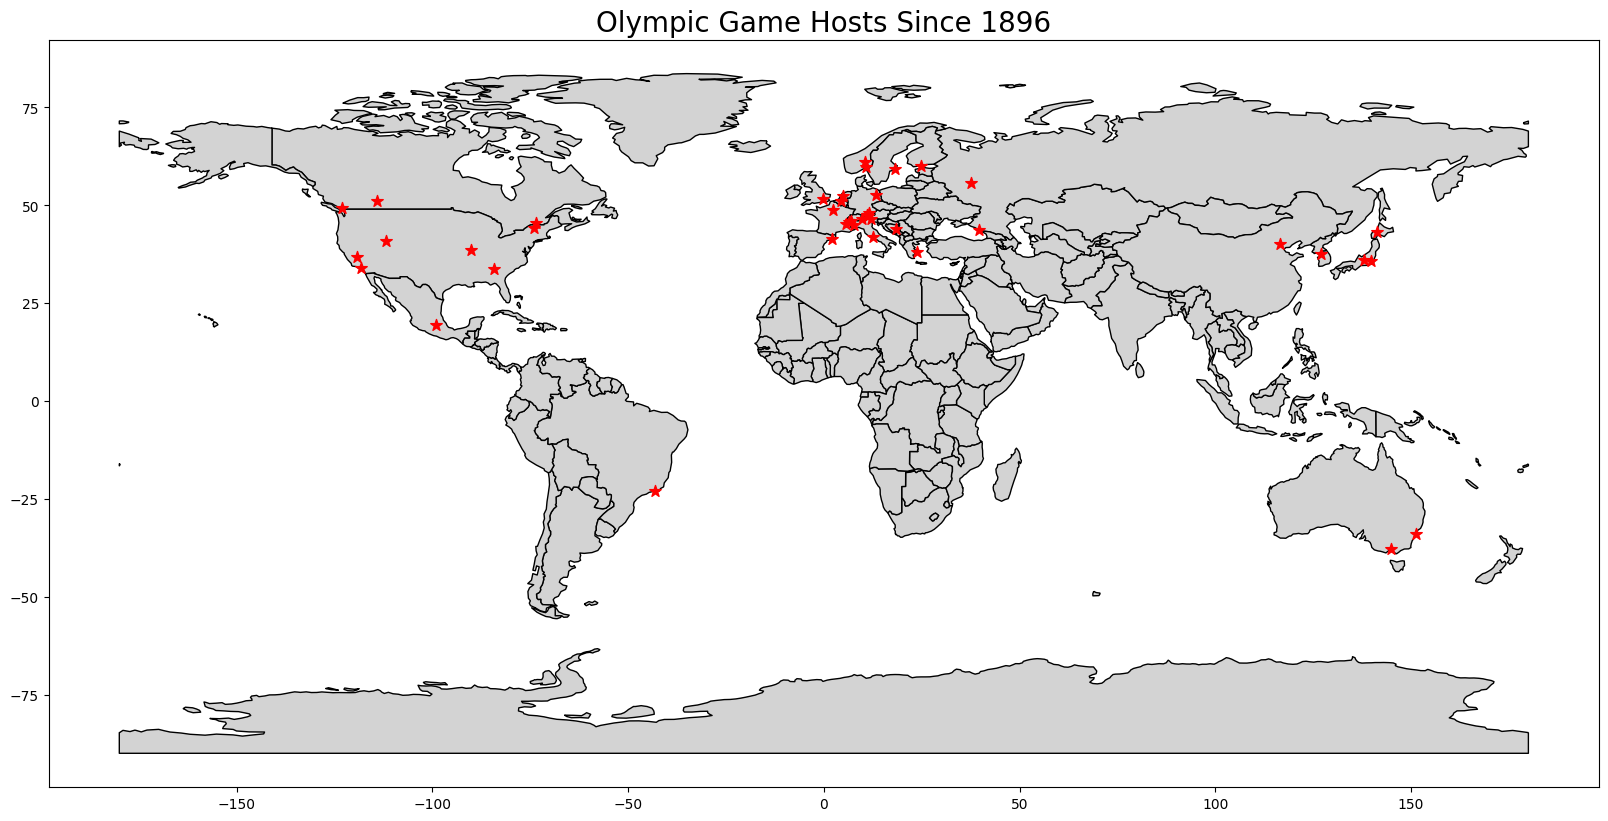

In [20]:
import os
import zipfile
import requests

# download the dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'

# Directory where the shapefile will be downloaded and extracted
download_dir = 'natural_earth'
shapefile_path = os.path.join(download_dir, 'ne_110m_admin_0_countries.shp')


if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# download the set if it is not already downloaded
zip_path = os.path.join(download_dir, 'ne_110m_admin_0_countries.zip')
if not os.path.exists(zip_path):
    print("Downloading Natural Earth shapefile...")
    response = requests.get(url)

    # check if the request was successful
    if response.status_code == 200:
        with open(zip_path, 'wb') as f:
            f.write(response.content)
        print("Download complete!")
    else:
        print(f"Failed to download. Status code: {response.status_code}")

# extract
if zip_path.endswith('.zip') and not os.path.exists(shapefile_path):
    try:
        print("Extracting the dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(download_dir)
        print("Extraction complete!")
    except zipfile.BadZipFile:
        print("Failed to extract: The file is not a valid zip archive or is corrupted.")

# load
print("Loading the shapefile into GeoPandas...")
world = gpd.read_file(shapefile_path)

# Plot the world map
base = world.plot(color='lightgrey', edgecolor='black', figsize=(20,10))
host_cities.plot(ax=base, marker='*', color='red', markersize=75)

# annotation - but it is not useful for this example
#for x, y, label in zip(host_cities.geometry.x, host_cities.geometry.y, host_cities.City):
#    base.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.title('Olympic Game Hosts Since 1896', fontsize=20)
#plt.savefig('olympic_hosts.png', dpi=100)  # increase dpi for poster version
plt.show()

# Additional data including medalist from years : 2020, 2024

In [21]:
additional_male_winners = {
    'Volleyball': {
        '2020': {
            'Gold': 'France',
            'Silver': 'Russia',
            'Bronze': 'Argentina'
        },
        '2024': {
            'Gold': 'France',
            'Silver': 'Poland',
            'Bronze': 'Brazil'
        }
    },
    'Beach Volleyball': {
        '2020': {
            'Gold': 'Norway',
            'Silver': 'ROC',
            'Bronze': 'Qatar'
        },
        '2024': {
            'Gold': 'Sweden',
            'Silver': 'Germany',
            'Bronze': 'Norway'
        }
    }
}

additional_female_winners = {
    'Volleyball': {
        '2020': {
            'Gold': 'United States',
            'Silver': 'Brazil',
            'Bronze': 'Serbia'
        },
        '2024': {
            'Gold': 'Italy',
            'Silver': 'Serbia',
            'Bronze': 'Brazil'
        }
    },
    'Beach Volleyball': {
        '2020': {
            'Gold': 'United States',
            'Silver': 'Australia',
            'Bronze': 'Switzerland'
        },
        '2024': {
            'Gold': 'Brazil',
            'Silver': 'Canada',
            'Bronze': 'Switzerland'
        }
    }
}


# Additional data preparation

I found pdf with official scores and statictics of each player from Olympics in Beijing 2008, London 2012 and Rio 2016. With help of CHATGPT we retrived all the information from this pdf and created csv_files with them. They will be helpfull to checking how physical statistics, can affect the chances of getting a medal on Olympics

In [22]:
# functions to help with merging the data

def create_data_frame(csv_file: str) -> pd.DataFrame:
    df = pd.read_csv(csv_file)
    return df

def concat_two_data_frames(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    merged = pd.concat([df1, df2], axis=0)
    return merged

def get_list_of_files_from_folder_path(folder_path: str) -> list:
    files = os.listdir(folder_path)
    return [os.path.join(folder_path, file) for file in files]

def create_data_frame_from_files(folder_path: str) -> pd.DataFrame:
    files = get_list_of_files_from_folder_path(folder_path)

    first_df = create_data_frame(files[0])
    for file in files[1:]:
        df = create_data_frame(file)
        first_df = concat_two_data_frames(first_df, df)

    return first_df

### Getting dataframes

In [23]:
# pathes to the data
BEIJING_PATH = 'beijing'
LONDON_PATH = 'london'
RIO_PATH = 'rio'

# create data frames
beijing = create_data_frame_from_files(BEIJING_PATH)
london = create_data_frame_from_files(LONDON_PATH)
rio = create_data_frame_from_files(RIO_PATH)

In [24]:
beijing.head(200)

,Nr,Name/First Name,Nickname,Birthdate,H,W,S,B,OG,WC,OTH,Total,Club,Sex,Country
0,1,Mélinda Raissa Hennaoui,Hennaoui,18/03/1990,178,68,290,278.0,5.0,5.0,NaN,NaN,Istres Volleyball,F,Algeria
1,2,Sehryne Hennaoui,Hennaoui,10/01/1988,172,69,285,273.0,15.0,15.0,NaN,NaN,Istres Volleyball,F,Algeria
2,3,Salima Hammouche,Hammouche,17/01/1984,165,58,270,265.0,15.0,15.0,NaN,NaN,Nc Bejaia,F,Algeria
3,4,Nassima Saliha Benhamouda Ep Akouche,Benhamouda,20/10/1973,180,67,299,287.0,3.0,85.0,88.0,NaN,Mc Alger,F,Algeria
4,5,Mouni Amrane,Amrane,19/05/1991,183,60,300,290.0,10.0,10.0,NaN,NaN,Montreal Volleyball,F,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Aguero Taismary,Aguero,05/03/1977,177,74,306,285.0,8.0,105.0,NaN,113.0,Tur Telekom,F,Italy
16,17,Gioli Simona,Gioli,17/09/1977,185,70,308,285.0,8.0,105.0,NaN,113.0,Despar Sirio Perugia,F,Italy
17,18,Pincerato Giulia,Pincerato,16/03/1987,182,68,294,279.0,1.0,NaN,NaN,1.0,Unicom Starker Sassuolo,F,Italy
0,1,Saito Nobuharu,Saito,29/09/1973,205,95,345,330.0,11.0,139.0,150.0,NaN,Toray Arrows,M,Japan


In [25]:
london.head(200)

,No,Name,Shirt Name,Height m / ft in,Weight kg / lbs,Highest Reach Spike cm,Block cm,Date of Birth,Club,WCH,...,Int,Tot,Country,Sex,C/L,National Selections WCH,National Selections OG,National Selections Int,National Selections Tot,Highest Reach Block cm
0,1,HENNAOUI Sehryne,HENNAOUI S.,"1.72/5'8""",69/152,285,273.0,10 JAN 1988,"Hainaut Volleyball, Valenciennes (FRA)",0.0,...,15.0,20.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ACHOUR Dallal Merwa,ACHOUR,"1.75/5'9""",60/132,279,273.0,03 NOV 1994,"ESF Mouzaia, Blida (ALG)",0.0,...,12.0,12.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
2,3,HAMMOUCHE Salima,SALIMA,"1.58/5'2""",54/119,270,265.0,17 JAN 1984,"G.S. Petroliers, Alger (ALG)",5.0,...,10.0,15.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
3,5,KHAMTACHE Amel,KHAMTACHE,"1.81/5'11""",65/143,303,235.0,04 MAY 1990,"G.S. Petroliers, Alger (ALG)",0.0,...,5.0,5.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
4,8,BENSALEM Zohra,BENSALEM,"1.78/5'10""",68/150,310,299.0,05 APR 1994,"G.S. Petroliers, Alger (ALG)",5.0,...,50.0,55.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,18,MIKHAYLOV Maxim,Mikhaylov,"2.10/6'11""",95,345,NaN,19 FEB 1988,"Zenit Kazan, Kazan (RUS)",17.0,...,158.0,158.0,Russia,Men,NaN,NaN,NaN,NaN,NaN,341.0
10,20,OBMOCHAEV Alexey,Obmochaev,"1.88/6'2""",85,325,NaN,22 MAY 1989,"Zenit Kazan, Kazan (RUS)",0.0,...,3.0,3.0,Russia,Men,L,NaN,NaN,NaN,NaN,310.0
0,1,BORISENKO Maria,Borodakova,"1.90/6'3""",80/176,301,297.0,08 MAR 1986,"Dinamo-Kazan, Kazan (RUS)",20.0,...,53.0,79.0,Russia,F,NaN,NaN,NaN,NaN,NaN,NaN
1,3,PEREPELKINA Maria,Perepelkina,"1.87/6'2""",72/159,304,300.0,09 MAR 1984,"Dinamo Moscow, Moscow (RUS)",11.0,...,17.0,28.0,Russia,F,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
rio.head(200)

,No.,Name / First Name,Nickname,Birthdate,H,W,S,B,WCH,OG,OTH,Tot.,Club,Country,Sex
0,1,Bruno Nicolas,Bruno,24.02.89,187.0,85.0,338.0,318.0,6.0,4.0,43.0,49.0,Personal Bolivar,Argentina,M
1,2,Flores Fabian,Flores,25.05.91,194.0,85.0,335.0,315.0,6.0,4.0,40.0,46.0,Club Ciudad de Campana,Argentina,M
2,3,Martinez Franchi Jan,Martinez,28.01.98,197.0,85.0,338.0,318.0,6.0,4.0,40.0,46.0,Club Ciudad de Buenos Aires,Argentina,M
3,4,Ramos Martin,Ramos,30.03.94,199.0,90.0,350.0,340.0,6.0,4.0,42.0,48.0,UPC San Juan,Argentina,M
4,5,Uriarte Nicolas,Uriarte,21.03.90,192.0,84.0,340.0,330.0,9.0,4.0,45.0,58.0,PGE Skra Belchatow,Argentina,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,Nelli Gabriele,Nelli,04.12.93,210.0,95.0,335.0,320.0,7.0,7.0,70.0,84.0,Trentino Volley,Italy,M
2,3,Sottile Pasquale,Sottile,19.09.79,190.0,80.0,325.0,310.0,8.0,10.0,90.0,108.0,Top Volley,Italy,M
3,4,Vettori Luca,Vettori,26.04.91,202.0,103.0,335.0,333.0,13.0,12.0,85.0,110.0,Modena Volley Punto Zero,Italy,M
4,5,Juantorena Osmany,Juantorena,12.08.85,195.0,90.0,355.0,340.0,13.0,15.0,135.0,163.0,Dynamo Moscow,Italy,M


### Cleaning dataframes

I need to clean the dataframes so they will contain the same informations in the same format. Statistics I will need :

    - birthdate [to calculate the age at the time of olympics]
    - spike reach (in cm)
    - block reach (in cm)
    - club ()
    - sex
    - country

In [27]:
# getting columns names from each data frame
beijing_columns = beijing.columns
london_columns = london.columns
rio_columns = rio.columns

beijing_columns, london_columns, rio_columns

(Index(['Nr', 'Name/First Name', 'Nickname', 'Birthdate', 'H', 'W', 'S', 'B',
        'OG', 'WC', 'OTH', 'Total', 'Club', 'Sex', 'Country'],
       dtype='object'),
 Index(['No', 'Name', 'Shirt Name', 'Height m / ft in', 'Weight kg / lbs',
        'Highest Reach Spike cm', 'Block cm', 'Date of Birth', 'Club', 'WCH',
        'OG', 'Int', 'Tot', 'Country', 'Sex', 'C/L', 'National Selections WCH',
        'National Selections OG', 'National Selections Int',
        'National Selections Tot', 'Highest Reach Block cm'],
       dtype='object'),
 Index(['No.', 'Name / First Name', 'Nickname', 'Birthdate', 'H', 'W', 'S', 'B',
        'WCH', 'OG', 'OTH', 'Tot.', 'Club', 'Country', 'Sex'],
       dtype='object'))

In [28]:
# making a subset of columns
beijing_subset = ['Name/First Name', 'Birthdate', 'S', 'B', 'Sex', 'Country', 'Club']
london_subset = ['Name', 'Highest Reach Spike cm', 'Block cm', 'Date of Birth', 'Club', 'Country', 'Sex']
rio_subset = ['Name / First Name', 'Birthdate','S', 'B', 'Club', 'Country', 'Sex']

# getting the dataframes
beijing_df = beijing.copy()[beijing_subset]
london_df = london.copy()[london_subset]
rio_df = rio.copy()[rio_subset]

In [29]:
beijing_df.head()

,Name/First Name,Birthdate,S,B,Sex,Country,Club
0,Mélinda Raissa Hennaoui,18/03/1990,290,278.0,F,Algeria,Istres Volleyball
1,Sehryne Hennaoui,10/01/1988,285,273.0,F,Algeria,Istres Volleyball
2,Salima Hammouche,17/01/1984,270,265.0,F,Algeria,Nc Bejaia
3,Nassima Saliha Benhamouda Ep Akouche,20/10/1973,299,287.0,F,Algeria,Mc Alger
4,Mouni Amrane,19/05/1991,300,290.0,F,Algeria,Montreal Volleyball


In [30]:
london_df.head()

,Name,Highest Reach Spike cm,Block cm,Date of Birth,Club,Country,Sex
0,HENNAOUI Sehryne,285,273.0,10 JAN 1988,"Hainaut Volleyball, Valenciennes (FRA)",Algeria,F
1,ACHOUR Dallal Merwa,279,273.0,03 NOV 1994,"ESF Mouzaia, Blida (ALG)",Algeria,F
2,HAMMOUCHE Salima,270,265.0,17 JAN 1984,"G.S. Petroliers, Alger (ALG)",Algeria,F
3,KHAMTACHE Amel,303,235.0,04 MAY 1990,"G.S. Petroliers, Alger (ALG)",Algeria,F
4,BENSALEM Zohra,310,299.0,05 APR 1994,"G.S. Petroliers, Alger (ALG)",Algeria,F


In [31]:
rio_df.head()

,Name / First Name,Birthdate,S,B,Club,Country,Sex
0,Bruno Nicolas,24.02.89,338.0,318.0,Personal Bolivar,Argentina,M
1,Flores Fabian,25.05.91,335.0,315.0,Club Ciudad de Campana,Argentina,M
2,Martinez Franchi Jan,28.01.98,338.0,318.0,Club Ciudad de Buenos Aires,Argentina,M
3,Ramos Martin,30.03.94,350.0,340.0,UPC San Juan,Argentina,M
4,Uriarte Nicolas,21.03.90,340.0,330.0,PGE Skra Belchatow,Argentina,M


### Format dataframes

Although we have the same information in each data frame, it is stored differently. So now I have to perform the following steps: 

    1.Name all the columns in the same way
    2.Add a column with Year of Olympics
    3. Change all the data to have the same format (date, weight, height, spike, block)
    4. Change all the names to fomrat : <Last_name First_name>

In [32]:
# changing the column names
BEIJING_NEW_COLUMNS = ['Name', 'Birthdate','Spike', 'Block', 'Sex', 'Country', 'Club']
LONDON_NEW_COLUMNS = ['Name','Spike', 'Block', 'Birthdate', 'Club', 'Country','Sex']
RIO_NEW_COLUMNS = ['Name', 'Birthdate','Spike', 'Block', 'Club', 'Country', 'Sex']


beijing_df.columns = BEIJING_NEW_COLUMNS
london_df.columns = LONDON_NEW_COLUMNS
rio_df.columns = RIO_NEW_COLUMNS

beijing_df.columns, london_df.columns, rio_df.columns

(Index(['Name', 'Birthdate', 'Spike', 'Block', 'Sex', 'Country', 'Club'], dtype='object'),
 Index(['Name', 'Spike', 'Block', 'Birthdate', 'Club', 'Country', 'Sex'], dtype='object'),
 Index(['Name', 'Birthdate', 'Spike', 'Block', 'Club', 'Country', 'Sex'], dtype='object'))

#### Dates

In [33]:
# cahnge the date format
beijing_df['Birthdate'] = pd.to_datetime(beijing_df['Birthdate'], format='mixed')
rio_df['Birthdate'] = pd.to_datetime(rio_df['Birthdate'], format='mixed')
london_df['Birthdate'] = pd.to_datetime(london_df['Birthdate'], format='mixed')

In [34]:
beijing_df['Birthdate'].head(1), rio_df['Birthdate'].head(1), london_df['Birthdate'].head(1)

(0   1990-03-18
 Name: Birthdate, dtype: datetime64[ns],
 0   1989-02-24
 Name: Birthdate, dtype: datetime64[ns],
 0   1988-01-10
 Name: Birthdate, dtype: datetime64[ns])

#### Name

In [35]:
# function to change the name format
def change_name_format(df: pd.DataFrame) -> pd.DataFrame:
    df['Name'] = df['Name'].str.title()

change_name_format(beijing_df)
change_name_format(rio_df)
change_name_format(london_df)

beijing_df['Name'].head(1), rio_df['Name'].head(1), london_df['Name'].head(1)


(0    Mélinda Raissa Hennaoui
 Name: Name, dtype: object,
 0    Bruno Nicolas
 Name: Name, dtype: object,
 0    Hennaoui Sehryne
 Name: Name, dtype: object)

#### Height and Weight for london dataset

#### Adding the year of Olympics

In [36]:
beijing_df['Olympic'] = '2008'
london_df['Olympic'] = '2012'
rio_df['Olympic'] = '2016'

#### How the dataframes look after formatting : 

In [37]:
beijing_df.head()

,Name,Birthdate,Spike,Block,Sex,Country,Club,Olympic
0,Mélinda Raissa Hennaoui,1990-03-18,290,278.0,F,Algeria,Istres Volleyball,2008
1,Sehryne Hennaoui,1988-10-01,285,273.0,F,Algeria,Istres Volleyball,2008
2,Salima Hammouche,1984-01-17,270,265.0,F,Algeria,Nc Bejaia,2008
3,Nassima Saliha Benhamouda Ep Akouche,1973-10-20,299,287.0,F,Algeria,Mc Alger,2008
4,Mouni Amrane,1991-05-19,300,290.0,F,Algeria,Montreal Volleyball,2008


In [38]:
london_df.head()

,Name,Spike,Block,Birthdate,Club,Country,Sex,Olympic
0,Hennaoui Sehryne,285,273.0,1988-01-10,"Hainaut Volleyball, Valenciennes (FRA)",Algeria,F,2012
1,Achour Dallal Merwa,279,273.0,1994-11-03,"ESF Mouzaia, Blida (ALG)",Algeria,F,2012
2,Hammouche Salima,270,265.0,1984-01-17,"G.S. Petroliers, Alger (ALG)",Algeria,F,2012
3,Khamtache Amel,303,235.0,1990-05-04,"G.S. Petroliers, Alger (ALG)",Algeria,F,2012
4,Bensalem Zohra,310,299.0,1994-04-05,"G.S. Petroliers, Alger (ALG)",Algeria,F,2012


In [39]:
rio_df.head()

,Name,Birthdate,Spike,Block,Club,Country,Sex,Olympic
0,Bruno Nicolas,1989-02-24,338.0,318.0,Personal Bolivar,Argentina,M,2016
1,Flores Fabian,1991-05-25,335.0,315.0,Club Ciudad de Campana,Argentina,M,2016
2,Martinez Franchi Jan,1998-01-28,338.0,318.0,Club Ciudad de Buenos Aires,Argentina,M,2016
3,Ramos Martin,1994-03-30,350.0,340.0,UPC San Juan,Argentina,M,2016
4,Uriarte Nicolas,1990-03-21,340.0,330.0,PGE Skra Belchatow,Argentina,M,2016


#### Merging 3 dataframes into one

In [40]:
merged_additional_df = pd.concat([beijing_df, london_df, rio_df], axis=0)

# remove 0 and None values
merged_additional_df = merged_additional_df[merged_additional_df['Spike'] != 0]
merged_additional_df = merged_additional_df[merged_additional_df['Block'] != 0]

# change the value 734 to 334 -> error while retriving the data
merged_additional_df.loc[merged_additional_df['Spike'] == 734, 'Spike'] = 334


# How spike reach and block reach affect chances of getting a medal

In [41]:
merged_additional_df.head()

,Name,Birthdate,Spike,Block,Sex,Country,Club,Olympic
0,Mélinda Raissa Hennaoui,1990-03-18,290.0,278.0,F,Algeria,Istres Volleyball,2008
1,Sehryne Hennaoui,1988-10-01,285.0,273.0,F,Algeria,Istres Volleyball,2008
2,Salima Hammouche,1984-01-17,270.0,265.0,F,Algeria,Nc Bejaia,2008
3,Nassima Saliha Benhamouda Ep Akouche,1973-10-20,299.0,287.0,F,Algeria,Mc Alger,2008
4,Mouni Amrane,1991-05-19,300.0,290.0,F,Algeria,Montreal Volleyball,2008


In [42]:
def get_numeric_values(df: pd.DataFrame, column: str, year: int) -> list:
    list_of_values = df[df['Year'] == year][column].dropna().to_list()
    return [value for value in list_of_values if isinstance(value, (int, float))]

def get_avg_min_and_max_values(df: pd.DataFrame, column: str, year: int) -> tuple:
    values = get_numeric_values(df, column, year)
    if len(values) == 0:
        return None
    return sum(values) / len(values), min(values), max(values)

def get_avg_min_and_max_values_for_all_years(df: pd.DataFrame, column: str) -> dict:
    years = sorted(df['Year'].unique())
    result = {}
    for year in years:
        avg_min_max = get_avg_min_and_max_values(df, column, year)
        if avg_min_max is not None:  # Only add years with valid data
            avg, mini, maxi = avg_min_max
            result[year] = {'Average': avg, 'Minimum': mini, 'Maximum': maxi}
    return result

def plot_avg_min_max_values(data: dict, column: str, title: str, net_height: int) -> None:
    # Extract years and data, ensuring no missing values
    years = [year for year in data.keys() if not pd.isna(data[year]['Average'])]
    avg_values = [data[year]['Average'] for year in years]
    min_values = [data[year]['Minimum'] for year in years]
    max_values = [data[year]['Maximum'] for year in years]

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    plt.title(title, fontsize=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(column, fontsize=14)

    plt.ylim(220, 380)

    # Plot average, min, and max values
    ax.plot(years, avg_values, label=f'Average {column}', color='blue', marker='o', linestyle='-', linewidth=2)
    ax.fill_between(years, min_values, max_values, color='blue', alpha=0.05, label=f'Min-Max {column}')
    ax.axhline(y=net_height, color='black', linewidth=1, linestyle='--', label=f'Net Height ({net_height} cm)')

    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [43]:
# rename column
merged_additional_df.rename(columns={'Olympic':'Year'}, inplace=True)

# rename Sex values from Men to M
merged_additional_df.loc[merged_additional_df['Sex'] == 'Men'] = 'M'

# get subsets of men and women
male_merged_additional_df = merged_additional_df[merged_additional_df['Sex'] == 'M']
female_merged_additional_df = merged_additional_df[merged_additional_df['Sex'] == 'F']


C:\Users\barte\AppData\Local\Temp\ipykernel_19368\2442477018.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  merged_additional_df.loc[merged_additional_df['Sex'] == 'Men'] = 'M'
C:\Users\barte\AppData\Local\Temp\ipykernel_19368\2442477018.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_additional_df.loc[merged_additional_df['Sex'] == 'Men'] = 'M'
C:\Users\barte\AppData\Local\Temp\ipykernel_19368\2442477018.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible 

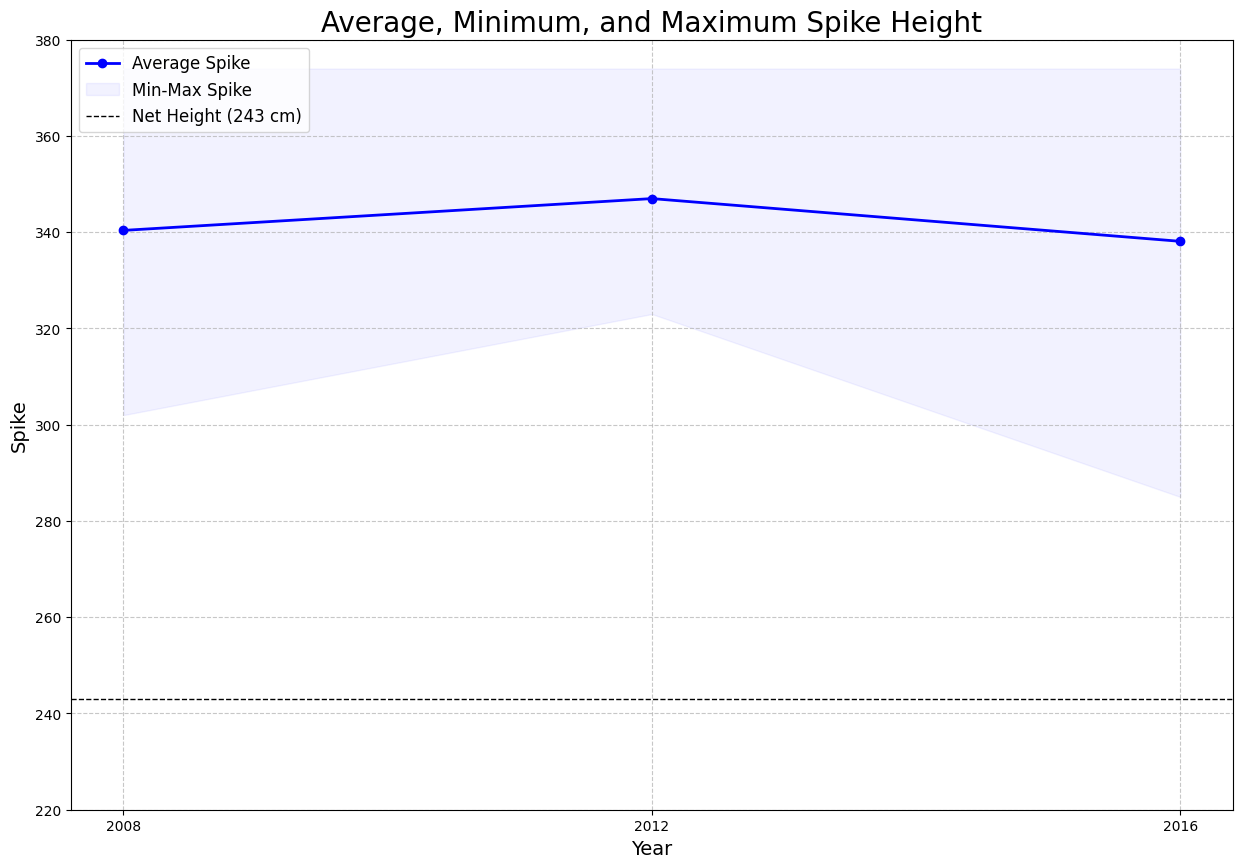

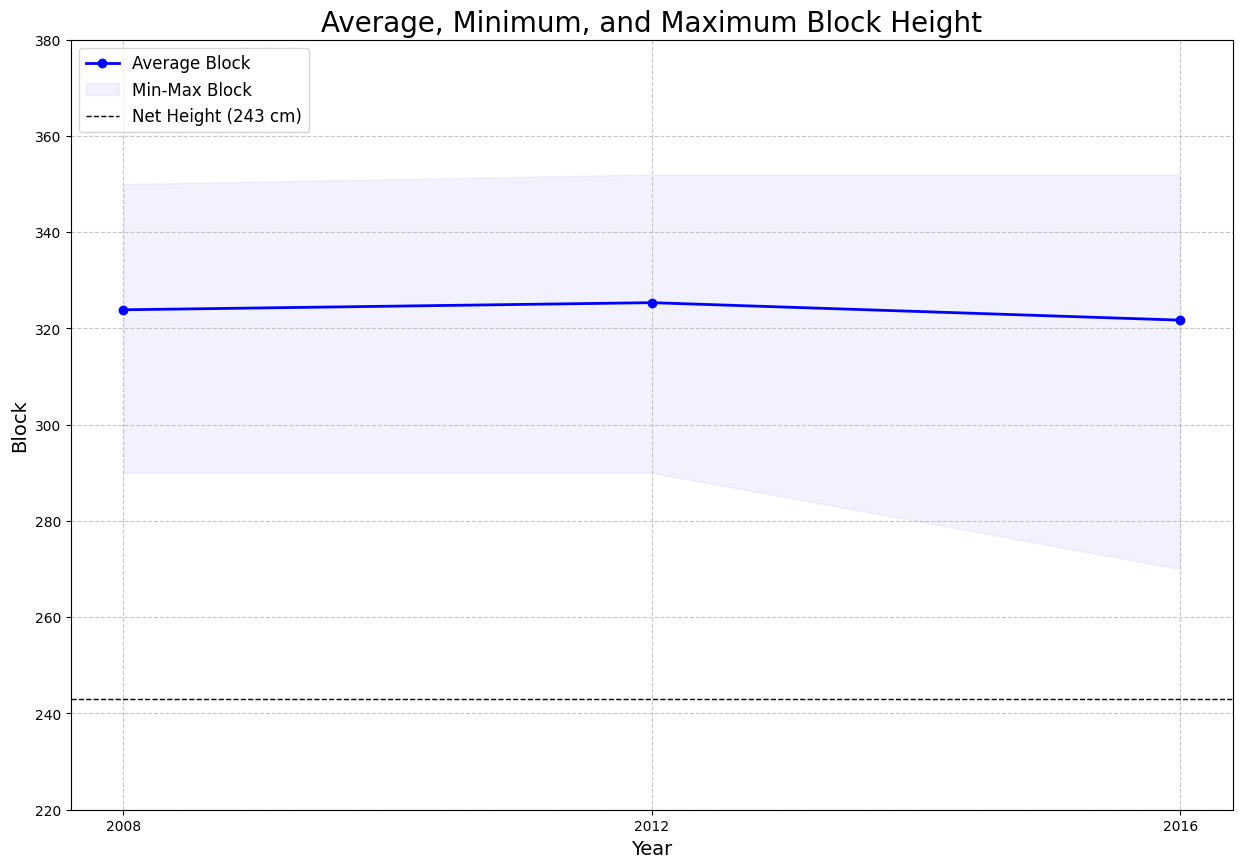

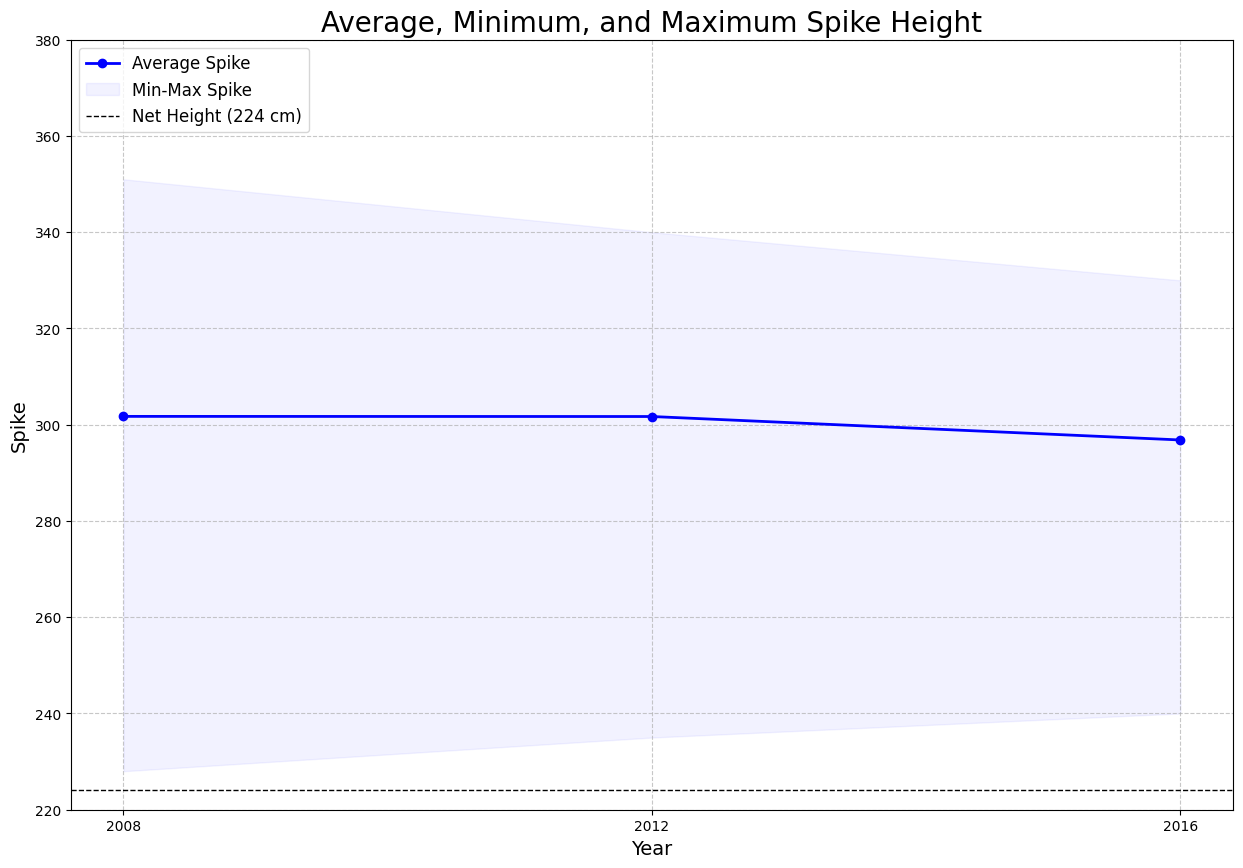

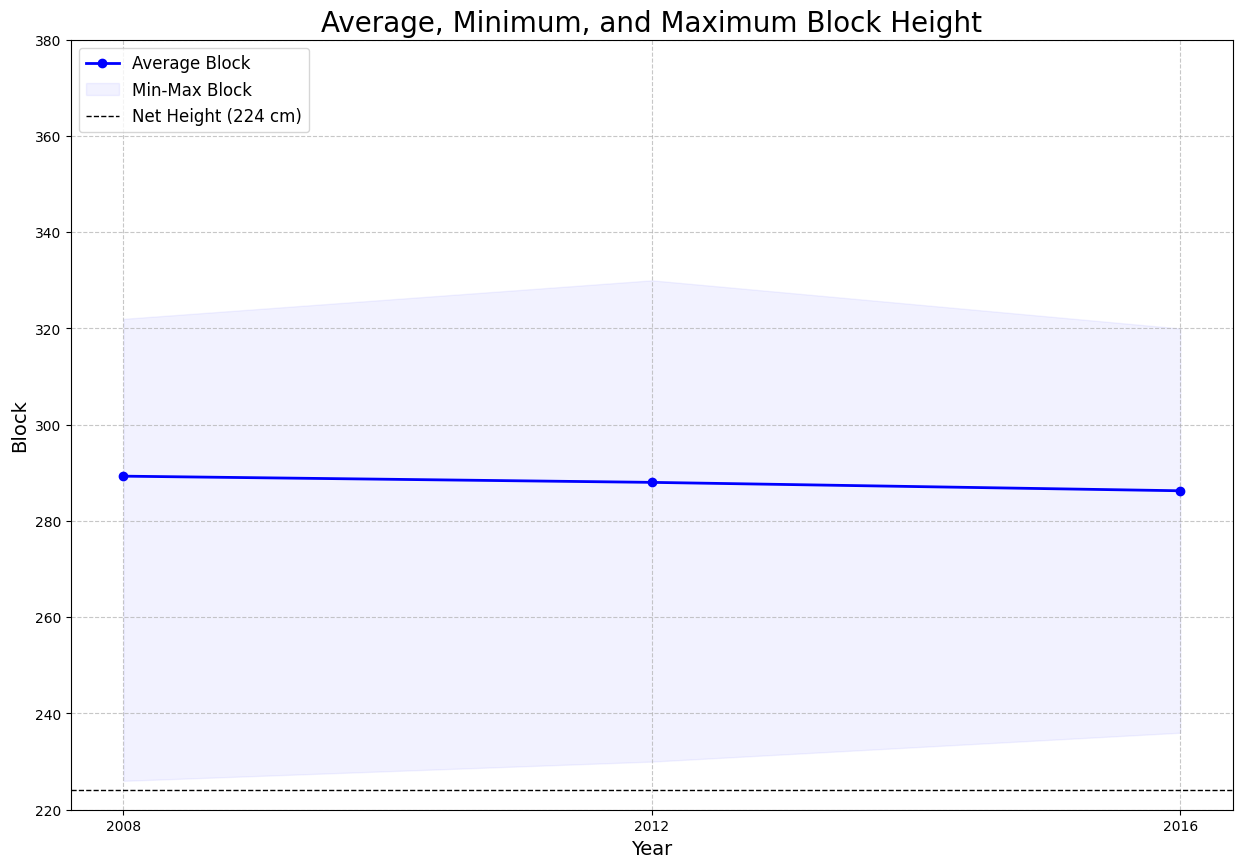

In [44]:
years = sorted(merged_additional_df['Year'].unique())

# get average, min and max values for all years
male_spike = get_avg_min_and_max_values_for_all_years(male_merged_additional_df, 'Spike')
male_block = get_avg_min_and_max_values_for_all_years(male_merged_additional_df, 'Block')

woman_spike = get_avg_min_and_max_values_for_all_years(female_merged_additional_df, 'Spike')
woman_block = get_avg_min_and_max_values_for_all_years(female_merged_additional_df, 'Block')

# plot the data
plot_avg_min_max_values(male_spike, 'Spike', 'Average, Minimum, and Maximum Spike Height', 243)
plot_avg_min_max_values(male_block, 'Block', 'Average, Minimum, and Maximum Block Height', 243)
plot_avg_min_max_values(woman_spike, 'Spike', 'Average, Minimum, and Maximum Spike Height', 224)
plot_avg_min_max_values(woman_block, 'Block', 'Average, Minimum, and Maximum Block Height', 224)


In [45]:
# noc_to_country = {
#     'USA' : 'USA',
#     'BRA' : 'Brazil',
#     'ITA' : 'Italy',
#     'RUS' : 'Russia',
# }

# def retrieve_medalist_countries(df, years, noc_to_country=noc_to_country):
#     result = {}
#     for year in years:
#         medals = {}
#         for medal in ['Gold', 'Silver', 'Bronze']:
#             countries = df[(df['Year'] == year) & (df['Medal'] == medal) & (df['Sport'] == 'Volleyball')]['NOC'].dropna().unique()
#             medals[medal] = [noc_to_country.get(country, country) for country in countries]
#         result[year] = medals
#     return result


# years = [2008, 2012, 2016]
# medalist_countries = retrieve_medalist_countries(man_volleyall_players, years)

# for year, medals in medalist_countries.items():
#     print(f"Year: {year}")
#     for medal, countries in medals.items():
#         print(f"  {medal}: {', '.join(countries)}")

# Volleyball data preparation

### Getting a subset with only volleyball players

In [46]:
# select athletes who played volleyball or beach volleyball
volleyball_athletes = athletes[athletes['Sport'].isin(['Volleyball', 'Beach Volleyball'])]
volleyball_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
291,156,Mahmoud Abd El-Kader,M,23.0,195.0,94.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN
299,161,Hossam Abdalla,M,28.0,203.0,97.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
318,171,Mahmoud Abdel Aziz,M,25.0,174.0,70.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,NaN
342,188,Mohamed Abdel Hamed,M,24.0,193.0,82.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Men's Volleyball,NaN
365,203,Ahmed Abdel Naeim,M,23.0,197.0,87.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN


In [47]:
volleyball_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3968 entries, 291 to 271091
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3968 non-null   int64  
 1   Name    3968 non-null   object 
 2   Sex     3968 non-null   object 
 3   Age     3959 non-null   float64
 4   Height  3828 non-null   float64
 5   Weight  3815 non-null   float64
 6   Team    3968 non-null   object 
 7   NOC     3968 non-null   object 
 8   Games   3968 non-null   object 
 9   Year    3968 non-null   int64  
 10  Season  3968 non-null   object 
 11  City    3968 non-null   object 
 12  Sport   3968 non-null   object 
 13  Event   3968 non-null   object 
 14  Medal   1041 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 496.0+ KB


I have information about 3404 playes, which should be enough to make an analysis on different aspects of volleyball at the Olympics Games

### Countries and players

In [48]:
unique_countries = volleyball_athletes['NOC'].nunique()
print(f'Number of unique countries: {unique_countries}')


Number of unique countries: 64


In [49]:
players_in_countries = volleyball_athletes['NOC'].value_counts()
players_in_countries.head()

NOC
BRA    333
USA    315
JPN    250
ITA    216
KOR    215
Name: count, dtype: int64

In [50]:
unique_players = volleyball_athletes['ID'].nunique()
print(f'Number of unique players: {unique_players}')

Number of unique players: 2867


In [51]:
volleyball_athletes['Sex'].value_counts()

Sex
M    2149
F    1819
Name: count, dtype: int64

In [52]:
woman_volleyall_players = volleyball_athletes[volleyball_athletes['Sex']=='F']
woman_volleyall_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
447,249,Mouni Abderrahim,F,22.0,173.0,60.0,Algeria,ALG,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,NaN
448,249,Mouni Abderrahim,F,26.0,173.0,60.0,Algeria,ALG,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,NaN
489,269,Fawziya Abdoulkarim,F,27.0,180.0,67.0,Cameroon,CMR,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NaN
799,457,Thorine Christelle Aboa Mbeza,F,23.0,182.0,78.0,Cameroon,CMR,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NaN
971,547,Nelli Mikhaylovna Abramova,F,24.0,171.0,60.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Volleyball,Volleyball Women's Volleyball,Silver


In [53]:
man_volleyall_players = volleyball_athletes[volleyball_athletes['Sex']=='M']
man_volleyall_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
291,156,Mahmoud Abd El-Kader,M,23.0,195.0,94.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN
299,161,Hossam Abdalla,M,28.0,203.0,97.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
318,171,Mahmoud Abdel Aziz,M,25.0,174.0,70.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,NaN
342,188,Mohamed Abdel Hamed,M,24.0,193.0,82.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Men's Volleyball,NaN
365,203,Ahmed Abdel Naeim,M,23.0,197.0,87.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN


# Plots

# Average height and weight of all players and average height and weight of medalist

In [54]:
man_volleyall_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
291,156,Mahmoud Abd El-Kader,M,23.0,195.0,94.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN
299,161,Hossam Abdalla,M,28.0,203.0,97.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
318,171,Mahmoud Abdel Aziz,M,25.0,174.0,70.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,NaN
342,188,Mohamed Abdel Hamed,M,24.0,193.0,82.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Men's Volleyball,NaN
365,203,Ahmed Abdel Naeim,M,23.0,197.0,87.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN


In [55]:
woman_volleyall_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
447,249,Mouni Abderrahim,F,22.0,173.0,60.0,Algeria,ALG,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,NaN
448,249,Mouni Abderrahim,F,26.0,173.0,60.0,Algeria,ALG,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,NaN
489,269,Fawziya Abdoulkarim,F,27.0,180.0,67.0,Cameroon,CMR,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NaN
799,457,Thorine Christelle Aboa Mbeza,F,23.0,182.0,78.0,Cameroon,CMR,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NaN
971,547,Nelli Mikhaylovna Abramova,F,24.0,171.0,60.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Volleyball,Volleyball Women's Volleyball,Silver


In [74]:
# extracting year
def extract_years_list(df: pd.DataFrame) -> list:
    return df['Year'].unique().tolist()

# extract all the height/weight of players form given year
def extract_feature(df: pd.DataFrame, year: int, feature: str) -> list:
    return df[df['Year'] == year][feature].dropna().tolist()

def extract_feature_of_medalist(df: pd.DataFrame, year: int, feature: str, medal: str) -> list:
    return df[(df['Year'] == year) & (df['Medal'] == medal)][feature].dropna().tolist()

def calculate_average_for_given_feature(feature: list) -> float:
    if len(feature) == 0:
        return 0
    return sum(feature) / len(feature)

def get_data_for_plot(df: pd.DataFrame, feature: str) -> dict:
    year_list = sorted(extract_years_list(man_volleyall_players))
    medals = ['Bronze', 'Silver', 'Gold']
    feature_values ={
        f'{feature}': [],
        f'bronze_{feature}': [],
        f'silver_{feature}': [],
        f'gold_{feature}': []
    }

    for year in year_list:
        average_feature = calculate_average_for_given_feature(extract_feature(df, year, feature))
        feature_values[f'{feature}'].append(average_feature)
        for medal in medals:
            medal_feature = calculate_average_for_given_feature(extract_feature_of_medalist(df, year, feature, medal))
            if medal == 'Bronze':
                feature_values[f'bronze_{feature}'].append(medal_feature)
            elif medal == 'Silver':
                feature_values[f'silver_{feature}'].append(medal_feature)
            elif medal == 'Gold':
                feature_values[f'gold_{feature}'].append(medal_feature)

    return feature_values


def plot_data(feature_dict: dict, years: list, feature: str, ax) -> plt.Axes:

    year_list = years
    values = feature_dict[feature]
    bronze_values = feature_dict[f'bronze_{feature}']
    silver_values = feature_dict[f'silver_{feature}']
    gold_values = feature_dict[f'gold_{feature}']

    # Plot with distinct markers and line styles
    ax.plot(year_list, values, label=f'Average {feature}', color='blue', marker='o', linestyle='-', linewidth=2)
    ax.plot(year_list, bronze_values, label=f'Bronze Medalist {feature}', color='brown', marker='^', linestyle='--', linewidth=3)
    ax.plot(year_list, silver_values, label=f'Silver Medalist {feature}', color='silver', marker='s', linestyle='-.', linewidth=3)
    ax.plot(year_list, gold_values, label=f'Gold Medalist {feature}', color='gold', marker='d', linestyle=':', linewidth=3)

    # Add labels and legend
    ax.set_xlabel('Year', fontsize=14)
    ax.set_xticks(year_list)
    ax.set_xticklabels(year_list, rotation=45)
    ax.set_ylabel(f'{feature}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', fontsize=12, frameon=False)

    return ax

def plot_2x2_subplot(first_male_feature_dict: dict, second_male_dict: dict, first_female_feature_dict: dict, second_female_dict: dict,  years: list, first_feature: str, second_feature: str, year_list: list):
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    # set limits for height and weight and years

    years_limits = [min(year_list) - 2, max(year_list) + 2]

    for ax in axs.flat:
        ax.set_xlim(years_limits)

    height_limits = [160, 210]
    weight_limits = [60, 100]

    # height
    plot_data(first_male_feature_dict, year_list, first_feature, axs[0, 0])
    axs[0, 0].set_title(f'Average {first_feature} - Men')
    axs[0, 0].set_ylim(height_limits)


    plot_data(first_female_feature_dict, year_list, first_feature, axs[0, 1])
    axs[0, 1].set_title(f'Average {first_feature} - Woman')
    axs[0, 1].set_ylim(height_limits)

    # weight
    plot_data(second_male_dict, year_list, second_feature, axs[1, 0])
    axs[1, 0].set_title(f'Average {second_feature} - Men')
    axs[1, 0].set_ylim(weight_limits)


    plot_data(second_female_dict, year_list, second_feature, axs[1, 1])
    axs[1, 1].set_title(f'Average {first_feature} - Woman')
    axs[1, 1].set_ylim(weight_limits)


    # Adjust layout
    plt.tight_layout()
    fig.suptitle(
        f'Comparison of {first_feature} and {second_feature} between Medalists and Other Players',
        fontsize=20,
        y=1.05  # Adjust position to place it above subplot titles
    )
    plt.show()



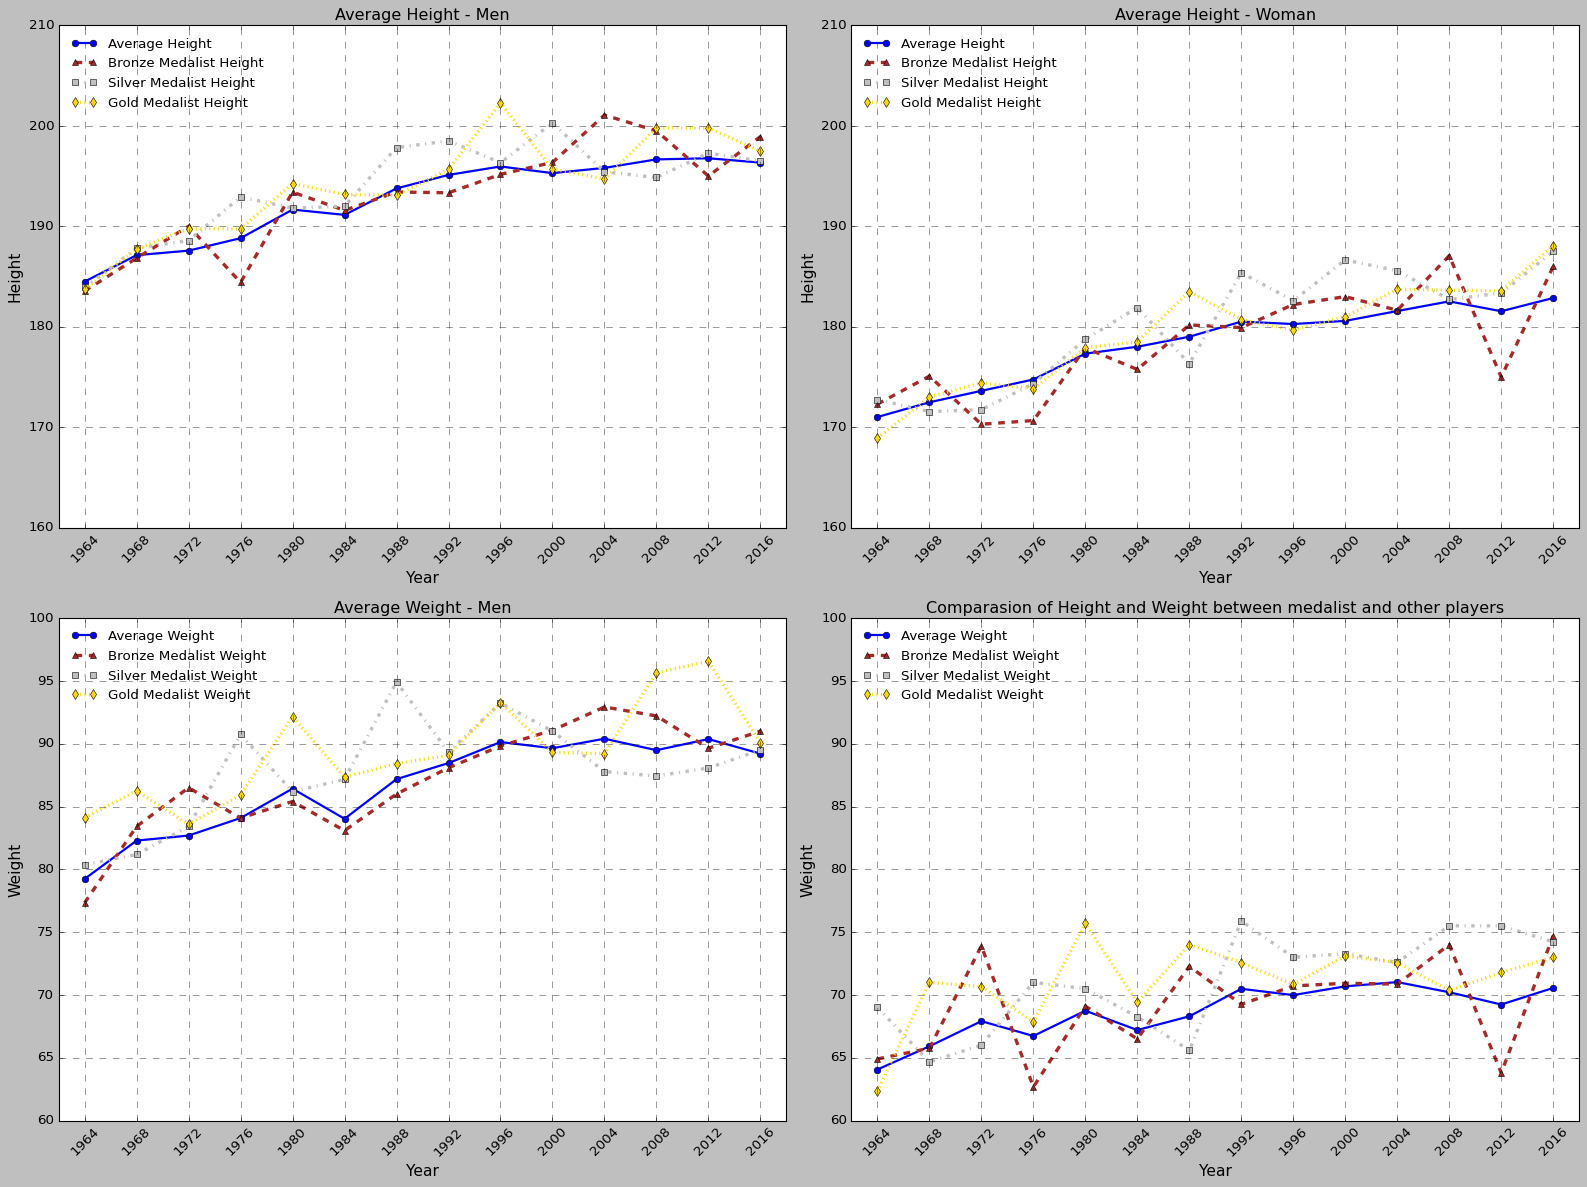

In [75]:
male_height = get_data_for_plot(man_volleyall_players, 'Height')
male_weight = get_data_for_plot(man_volleyall_players, 'Weight')

female_height = get_data_for_plot(woman_volleyall_players, 'Height')
female_weight = get_data_for_plot(woman_volleyall_players, 'Weight')
years = sorted(extract_years_list(man_volleyall_players))
plt.style.use('classic')
plot_2x2_subplot(male_height, male_weight, female_height, female_weight, years, 'Height', 'Weight', years)

# Best countries at olympics and where in all this is Poland

In [58]:
# get unique countries from volleyball players
unique_countries = volleyball_athletes['NOC'].unique()
unique_countries

array(['EGY', 'ALG', 'CMR', 'BRA', 'RUS', 'URS', 'ANG', 'VEN', 'ARG',
       'USA', 'CUB', 'ITA', 'MEX', 'GER', 'PER', 'CAN', 'AUS', 'BUL',
       'CRC', 'ESP', 'POL', 'KOR', 'FRA', 'CRO', 'TUN', 'JPN', 'DOM',
       'GDR', 'EUN', 'GRE', 'SRB', 'RSA', 'TUR', 'LBA', 'GBR', 'ROU',
       'NED', 'HUN', 'KEN', 'SCG', 'SUI', 'TCH', 'CZE', 'SWE', 'AUT',
       'NOR', 'CHN', 'YUG', 'BEL', 'UKR', 'POR', 'FRG', 'PUR', 'IRI',
       'KAZ', 'GEO', 'CHI', 'NZL', 'PRK', 'EST', 'INA', 'MRI', 'QAT',
       'LAT'], dtype=object)

In [59]:
# get unique years
unique_years = volleyball_athletes['Year'].unique()
unique_years

array([2008, 2016, 2000, 1984, 2012, 1972, 1976, 2004, 1964, 1968, 1996,
       1980, 1992, 1988])

In [60]:
# getting a single player from each country for each year and each discipline
def get_medal_count_for_each_country_based_on_gender(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby(['NOC', 'Year', 'Sport', 'Medal']).head(1).reset_index(drop=True)

male_medalist = get_medal_count_for_each_country_based_on_gender(man_volleyall_players)
female_medalist = get_medal_count_for_each_country_based_on_gender(woman_volleyall_players)


male_medalist = get_medal_count_for_each_country_based_on_gender(man_volleyall_players)
female_medalist = get_medal_count_for_each_country_based_on_gender(woman_volleyall_players)

In [61]:
female_medalist.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,547,Nelli Mikhaylovna Abramova,F,24.0,171.0,60.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Volleyball,Volleyball Women's Volleyball,Silver
1,837,Rachael Alexis Adams,F,26.0,188.0,81.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Bronze
2,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
3,1221,"Taismary ""Tai"" Agero Leiva (-Botteghi)",F,23.0,175.0,70.0,Cuba,CUB,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Women's Volleyball,Gold
4,1313,Robyn Mokihana Ah Mow-Santos,F,32.0,172.0,67.0,United States,USA,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,Silver


In [62]:
# constants
BRONZE = 'Bronze'
SILVER = 'Silver'
GOLD = 'Gold'

# dictionary with countries and count of medals over the years
def create_dictionary_with_country_medals(df: pd.DataFrame) -> dict:
    countries_medal_over_the_years = {}

    for country in unique_countries:
        countries_medal_over_the_years[country] = {GOLD: 0, SILVER: 0, BRONZE: 0}

    for idx, row in df.iterrows():
        country = row['NOC']
        medal = row['Medal']
        if medal == GOLD:
            countries_medal_over_the_years[country][GOLD] += 1
        elif medal == SILVER:
            countries_medal_over_the_years[country][SILVER] += 1
        elif medal == BRONZE:
            countries_medal_over_the_years[country][BRONZE] += 1

    return countries_medal_over_the_years



countries_medal_over_the_years_male = create_dictionary_with_country_medals(male_medalist)
countries_medal_over_the_years_female = create_dictionary_with_country_medals(female_medalist)
print(countries_medal_over_the_years_male)
print(countries_medal_over_the_years_female)


{'EGY': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'ALG': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'CMR': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'BRA': {'Gold': 5, 'Silver': 6, 'Bronze': 1}, 'RUS': {'Gold': 1, 'Silver': 1, 'Bronze': 2}, 'URS': {'Gold': 3, 'Silver': 2, 'Bronze': 1}, 'ANG': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'VEN': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'ARG': {'Gold': 0, 'Silver': 0, 'Bronze': 1}, 'USA': {'Gold': 6, 'Silver': 1, 'Bronze': 2}, 'CUB': {'Gold': 0, 'Silver': 0, 'Bronze': 1}, 'ITA': {'Gold': 0, 'Silver': 4, 'Bronze': 3}, 'MEX': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'GER': {'Gold': 1, 'Silver': 0, 'Bronze': 1}, 'PER': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'CAN': {'Gold': 0, 'Silver': 0, 'Bronze': 1}, 'AUS': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'BUL': {'Gold': 0, 'Silver': 1, 'Bronze': 0}, 'CRC': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'ESP': {'Gold': 0, 'Silver': 1, 'Bronze': 0}, 'POL': {'Gold': 1, 'Silver': 0, 'Bronze': 0}, 'KOR': {'Gold': 0, 'Silver': 0, '

In [63]:
# add additional data from 2020 and 2024
country_to_noc = {
    'France': 'FRA', 'ROC': 'RUS', 'Argentina': 'ARG', 'Poland': 'POL', 'Brazil': 'BRA',
    'Norway': 'NOR', 'Qatar': 'QAT', 'Sweden': 'SWE', 'Germany': 'GER',
    'United States': 'USA', 'Australia': 'AUS', 'Switzerland': 'SUI',
    'Italy': 'ITA', 'Serbia': 'SRB', 'Canada': 'CAN'
}

# update medal counts
def update_medal_counts(winners_dict, medal_counts_dict):
    for sport, years in winners_dict.items():
        for year, medals in years.items():
            for medal, country in medals.items():
                noc = country_to_noc.get(country)
                if noc and noc in medal_counts_dict:
                    medal_counts_dict[noc][medal] += 1


update_medal_counts(additional_male_winners, countries_medal_over_the_years_male)
update_medal_counts(additional_female_winners, countries_medal_over_the_years_female)


print("Updated Male Medal Counts:")
print(countries_medal_over_the_years_male)

print("\nUpdated Female Medal Counts:")
print(countries_medal_over_the_years_female)


Updated Male Medal Counts:
{'EGY': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'ALG': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'CMR': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'BRA': {'Gold': 5, 'Silver': 6, 'Bronze': 2}, 'RUS': {'Gold': 1, 'Silver': 2, 'Bronze': 2}, 'URS': {'Gold': 3, 'Silver': 2, 'Bronze': 1}, 'ANG': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'VEN': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'ARG': {'Gold': 0, 'Silver': 0, 'Bronze': 2}, 'USA': {'Gold': 6, 'Silver': 1, 'Bronze': 2}, 'CUB': {'Gold': 0, 'Silver': 0, 'Bronze': 1}, 'ITA': {'Gold': 0, 'Silver': 4, 'Bronze': 3}, 'MEX': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'GER': {'Gold': 1, 'Silver': 1, 'Bronze': 1}, 'PER': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'CAN': {'Gold': 0, 'Silver': 0, 'Bronze': 1}, 'AUS': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'BUL': {'Gold': 0, 'Silver': 1, 'Bronze': 0}, 'CRC': {'Gold': 0, 'Silver': 0, 'Bronze': 0}, 'ESP': {'Gold': 0, 'Silver': 1, 'Bronze': 0}, 'POL': {'Gold': 1, 'Silver': 1, 'Bronze': 0}, 'KOR':

In [64]:
def plot_bar_plot_with_swapped_medals_and_improvements(medal_dict: dict, gender: str, ax):
    plt.style.use('classic')
    # create a df from the dictionary
    medals_df = pd.DataFrame(medal_dict).T

    # Sort values
    medals_df['Total'] = medals_df.sum(axis=1)
    medals_df = medals_df.sort_values('Total', ascending=False)

    # Clean dataframe, so we only have countries with at least one medal
    medals_df = medals_df[medals_df['Total'] > 0]

    medals_df = medals_df[['Bronze', 'Silver', 'Gold', 'Total']]

    # plot
    medals_df.drop('Total', axis=1).plot(kind='bar', stacked=True, ax=ax, color=['#cd7f32', 'silver', 'gold'])

    # settings of the plot
    ax.set_title(f'Total Medals by Country - {gender}', fontsize=20)
    ax.set_xlabel('Country', fontsize=14)
    ax.set_ylabel('Number of Medals', fontsize=14)
    ax.legend(title='Medal', fontsize=12, title_fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticklabels(medals_df.index, rotation=45, ha='right')

    ax.set_ylim(0, 16)

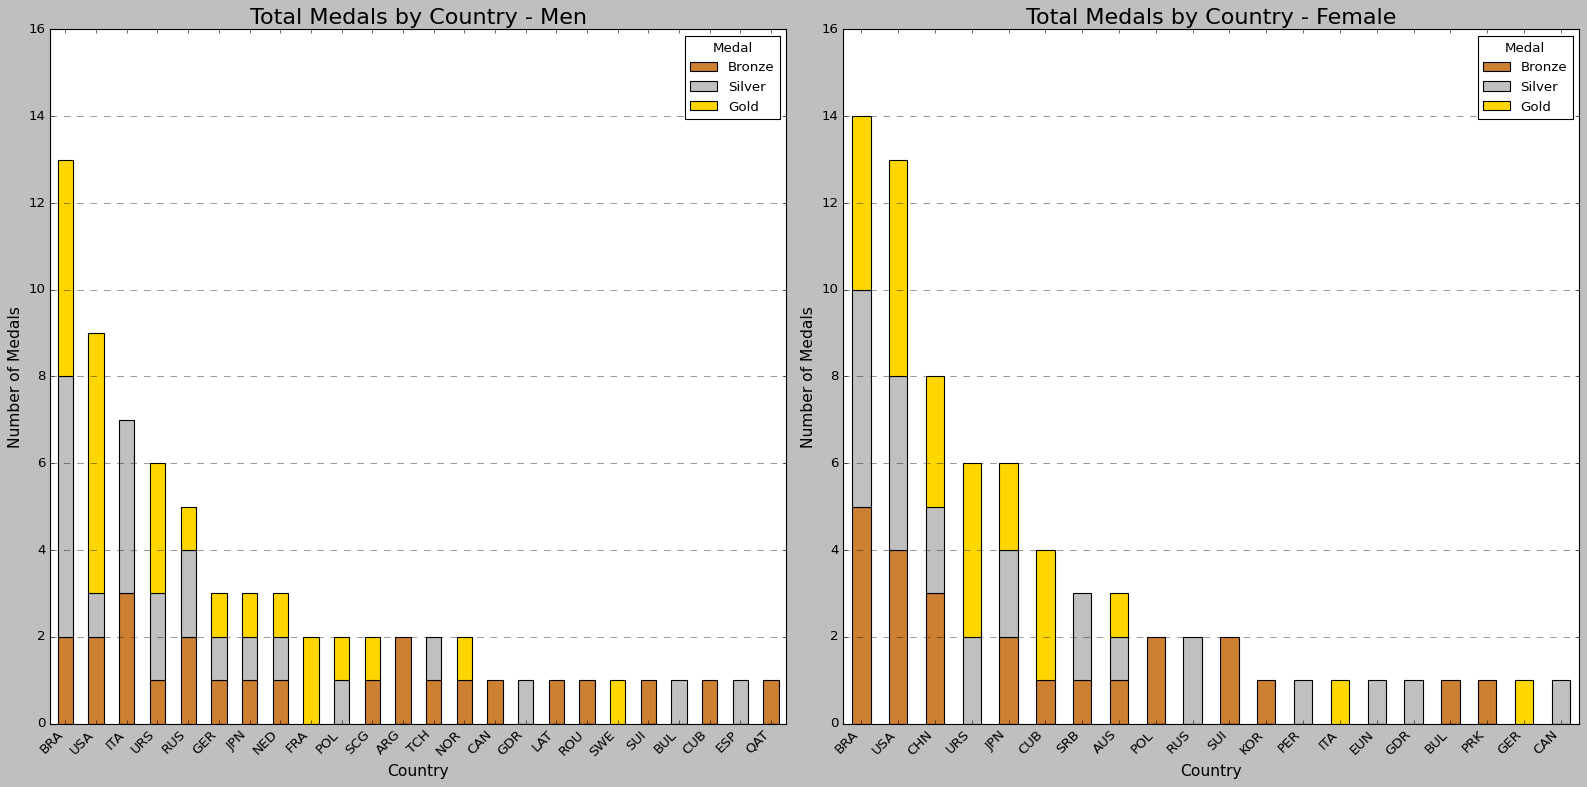

In [65]:
# create plot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# plot it
plot_bar_plot_with_swapped_medals_and_improvements(countries_medal_over_the_years_male, 'Men', axs[0])
plot_bar_plot_with_swapped_medals_and_improvements(countries_medal_over_the_years_female, 'Female', axs[1])

plt.tight_layout()
plt.show()


In [66]:
countries_medal_over_the_years = {}

for country in unique_countries:
    countries_medal_over_the_years[country] = {}

for year in unique_years:
    year_data = male_medalist[male_medalist['Year'] == year]
    for idx, row in year_data.iterrows():
        country = row['NOC']
        medal = row['Medal']
        if year not in countries_medal_over_the_years[country]:
            countries_medal_over_the_years[country][year] = {GOLD: 0, SILVER: 0, BRONZE: 0}
        if medal == GOLD:
            countries_medal_over_the_years[country][year][GOLD] += 1
        elif medal == SILVER:
            countries_medal_over_the_years[country][year][SILVER] += 1
        elif medal == BRONZE:
            countries_medal_over_the_years[country][year][BRONZE] += 1


# getting top 5 countries with the most medals in total

top_five_countries = {}

for country in unique_countries:
    total = 0
    for year in unique_years:
        if year in countries_medal_over_the_years[country]:
            medals = [countries_medal_over_the_years[country][year][medal] for medal in [GOLD, SILVER, BRONZE]]
            total += sum(medals)
    top_five_countries[country] = total

top_five_countries = dict(sorted(top_five_countries.items(), key=lambda item: item[1], reverse=True)[:5])

# foreach year track the number of total medals they got until that year, also track the number of gold, silver, and bronze medals for these countries
selected_countries = list(unique_countries)

# Initialize the result dictionary
cumulative_data = {}

for country in selected_countries:
    if country in countries_medal_over_the_years:
        years = sorted(countries_medal_over_the_years[country].keys())
        cumulative_medals = {'Gold': 0, 'Silver': 0, 'Bronze': 0, 'Total':0}
        cumulative_data[country] = {}
        for year in years:
            # Update cumulative totals
            cumulative_medals['Gold'] += countries_medal_over_the_years[country][year]['Gold']
            cumulative_medals['Silver'] += countries_medal_over_the_years[country][year]['Silver']
            cumulative_medals['Bronze'] += countries_medal_over_the_years[country][year]['Bronze']
            cumulative_medals['Total'] = cumulative_medals['Gold'] + cumulative_medals['Silver'] + cumulative_medals['Bronze']
            # Store cumulative totals for the year
            cumulative_data[country][year] = cumulative_medals.copy()

# # Print the result
# for country, yearly_data in cumulative_data.items():
#     print(f"{country}:")
#     for year, totals in yearly_data.items():
#         print(f"  {year}: {totals}")


# Popualrioty of volleyball around the world

In [67]:
unique_countries = volleyball_athletes['NOC'].unique()
unique_countries

array(['EGY', 'ALG', 'CMR', 'BRA', 'RUS', 'URS', 'ANG', 'VEN', 'ARG',
       'USA', 'CUB', 'ITA', 'MEX', 'GER', 'PER', 'CAN', 'AUS', 'BUL',
       'CRC', 'ESP', 'POL', 'KOR', 'FRA', 'CRO', 'TUN', 'JPN', 'DOM',
       'GDR', 'EUN', 'GRE', 'SRB', 'RSA', 'TUR', 'LBA', 'GBR', 'ROU',
       'NED', 'HUN', 'KEN', 'SCG', 'SUI', 'TCH', 'CZE', 'SWE', 'AUT',
       'NOR', 'CHN', 'YUG', 'BEL', 'UKR', 'POR', 'FRG', 'PUR', 'IRI',
       'KAZ', 'GEO', 'CHI', 'NZL', 'PRK', 'EST', 'INA', 'MRI', 'QAT',
       'LAT'], dtype=object)

In [68]:
def get_total_players_for_each_country(df: pd.DataFrame) -> pd.DataFrame:
    result = {}
    for country in unique_countries:
        result[country] = df[df['NOC'] == country]['ID'].nunique()
    return pd.DataFrame(result, index=['players_amount']).T

total_players = get_total_players_for_each_country(volleyball_athletes)
total_players

,players_amount
EGY,56
ALG,26
CMR,10
BRA,185
RUS,102
...,...
EST,4
INA,4
MRI,2
QAT,2


In [69]:
def map_noc_to_country(noc_list: list) -> dict:
    noc_to_country = {
        'EGY': 'Egypt',
        'ALG': 'Algeria',
        'CMR': 'Cameroon',
        'BRA': 'Brazil',
        'RUS': 'Russia',
        'URS': 'Soviet Union',
        'ANG': 'Angola',
        'VEN': 'Venezuela',
        'ARG': 'Argentina',
        'USA': 'United States of America',
        'CUB': 'Cuba',
        'ITA': 'Italy',
        'MEX': 'Mexico',
        'GER': 'Germany',
        'PER': 'Peru',
        'CAN': 'Canada',
        'AUS': 'Australia',
        'BUL': 'Bulgaria',
        'CRC': 'Costa Rica',
        'ESP': 'Spain',
        'POL': 'Poland',
        'KOR': 'South Korea',
        'FRA': 'France',
        'CRO': 'Croatia',
        'TUN': 'Tunisia',
        'JPN': 'Japan',
        'DOM': 'Dominican Republic',
        'GDR': 'East Germany',
        'EUN': 'Unified Team',
        'GRE': 'Greece',
        'SRB': 'Serbia',
        'RSA': 'South Africa',
        'TUR': 'Turkey',
        'LBA': 'Libya',
        'GBR': 'United Kingdom',
        'ROU': 'Romania',
        'NED': 'Netherlands',
        'HUN': 'Hungary',
        'KEN': 'Kenya',
        'SCG': 'Serbia and Montenegro',
        'SUI': 'Switzerland',
        'TCH': 'Czechoslovakia',
        'CZE': 'Czech Republic',
        'SWE': 'Sweden',
        'AUT': 'Austria',
        'NOR': 'Norway',
        'CHN': 'China',
        'YUG': 'Yugoslavia',
        'BEL': 'Belgium',
        'UKR': 'Ukraine',
        'POR': 'Portugal',
        'FRG': 'West Germany',
        'PUR': 'Puerto Rico',
        'IRI': 'Iran',
        'KAZ': 'Kazakhstan',
        'GEO': 'Georgia',
        'CHI': 'Chile',
        'NZL': 'New Zealand',
        'PRK': 'North Korea',
        'EST': 'Estonia',
        'INA': 'Indonesia',
        'MRI': 'Mauritius',
        'QAT': 'Qatar',
        'LAT': 'Latvia'
    }
    mapped_countries = [noc_to_country.get(noc, 'Unknown') for noc in noc_list]

    return mapped_countries

# get the countries
countries = map_noc_to_country(total_players.index.to_list())
total_players['Country'] = countries
total_players


,players_amount,Country
EGY,56,Egypt
ALG,26,Algeria
CMR,10,Cameroon
BRA,185,Brazil
RUS,102,Russia
...,...,...
EST,4,Estonia
INA,4,Indonesia
MRI,2,Mauritius
QAT,2,Qatar


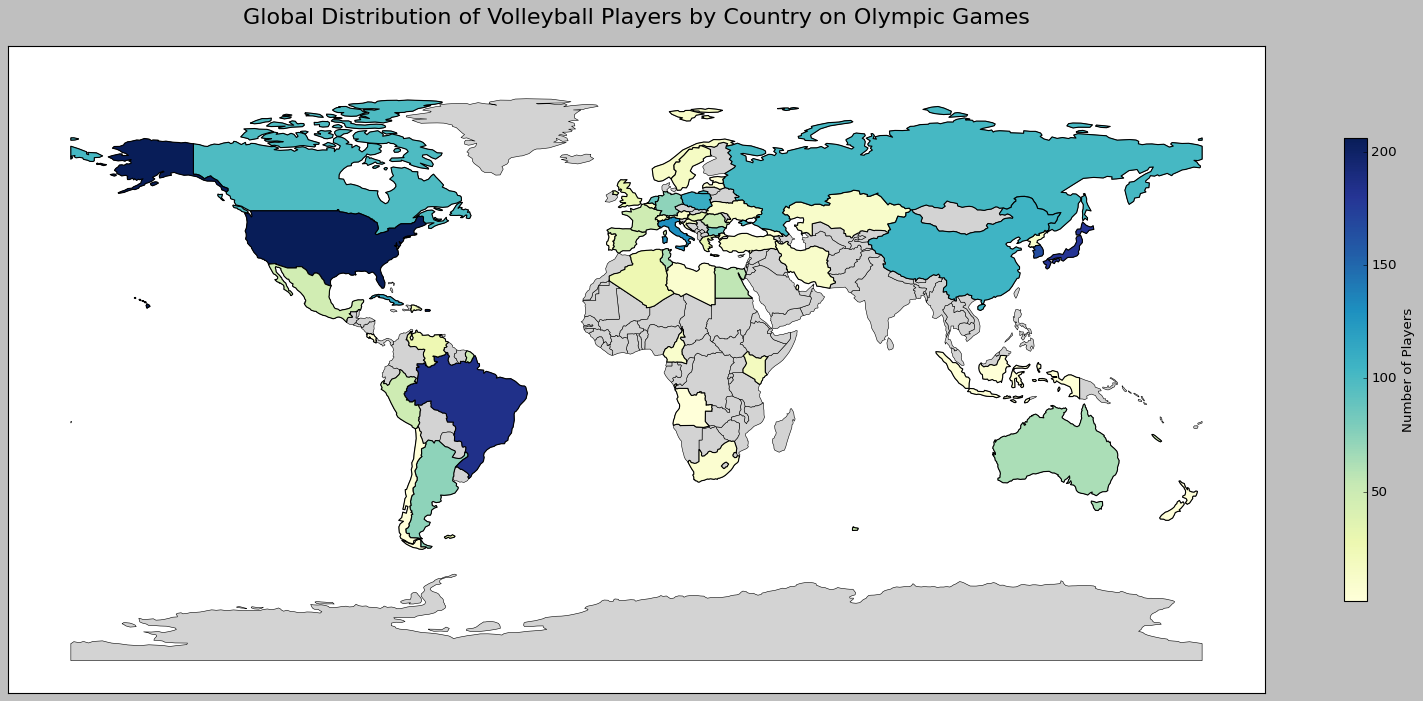

In [70]:
# Merge players amount with country map
world = gpd.read_file(shapefile_path)

# Plot the base world map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
base = world.plot(color='lightgrey', edgecolor='black', linewidth=0.5, ax=ax)

# Merge data and plot the data layer
world = world.merge(total_players, left_on='SOVEREIGNT', right_on='Country')
world.plot(
    column='players_amount',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Players",
        'orientation': "vertical",
        'shrink': 0.6
    },
    cmap='YlGnBu',
    missing_kwds={
        'color': 'lightgrey',
        'edgecolor': 'black'
    }
)

# Add an improved title
plt.title('Global Distribution of Volleyball Players by Country on Olympic Games', fontsize=20, pad=20)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Tighten the layout
plt.tight_layout()

# Display the plot
plt.show()


# Most effective and succesfull players